# 音響信号の基礎的なデモ

このデモは音の信号を全く扱ったことのない人向けのデモンストレーションです。

音のデジタル信号について会話するときに、最低限知っておいて欲しいことを書いています。

高校の物理で波についてとPythonの基礎知識を学習したことがあることを前提として記述しています。ご了承ください。

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import wave
from scipy.io.wavfile import read
import IPython
import scipy.fftpack as fft

In [2]:
filename = "audioSIgnalDemo/a_1.wav"
fs, data = read(filename)
audioData = data / np.max(data)

## 音響信号についての最低限の知識

音は空気の振動によって伝わります。

それをコンピュータ上で扱うためには、アナログ→デジタルの変換(AD変換)が必要です。

AD変換の際は、アナログの波形を**時間方向**と**振幅方向**の2方向についてデジタル化する必要があります。

### 標本化
時間方向へのデジタル化を、**標本化**もしくは**サンプリング**と言います。

1秒間に取るサンプル数が多いほど、そのデジタル信号は高い音まで再現することができます。

**サンプリング周波数**(fs [Hz])は、その1秒間に取るサンプル数を指します。

CD音源だとfs = 44100[Hz]、プロ用の音源だとfs=48000[Hz]が一般的です。

最近話題のハイレゾ音源はfs=96000[Hz]と、非常に高いサンプリング周波数を有しています。

ちなみに、デジタル音源はサンプリング周波数の1/2の周波数まで再現できます。

なので、fs = 48000[Hz]の場合、理論的には24000[Hz]まで再現できることになります。

人間の聴覚は大体20~20000[Hz]の帯域を音として認識できるとされているので、

これくらいで十分ということになります。

逆に、音声データを扱うときに、8000[Hz]程度までしか用いないのであれば、

サンプリング周波数を20000[Hz]程度まで下げても問題はないし、そのほうがデータ量を削減できます。

これをダウンサンプリングと言います。

### 量子化
振幅方向のデジタル化を、**量子化**と言います。

振幅方向の分割が多いほど、より精密に音を再現できます。

一般的に16bitが用いられることが多いです。

これは、人間の聴覚のダイナミックレンジが100[dB]程度であることに起因します。

ハイレゾ音源だと、24bitが用いられています。

### 周波数特性

フーリエ解析を大学の授業でさらったことがある人ならなんとなくお分かりかと思いますが、

音のデータは**時間特性**および**周波数特性**の2つの特性を持っています。

音響の世界では、周波数特性のことを略して**F特**とか言ったりするので、覚えておくと役に立つかもしれません。

今回は以下のような音声を使って、2つの特性のデモを行います。

以下の音声は[ここ](https://wsignal.sakura.ne.jp/onsei2007/wav_data51/wav_data51.html)から持ってきました。

In [3]:
IPython.display.display(IPython.display.Audio(data=audioData, rate=fs))

時間特性というのは、普段みなさんがみたことあるような、下のような波形を表します。

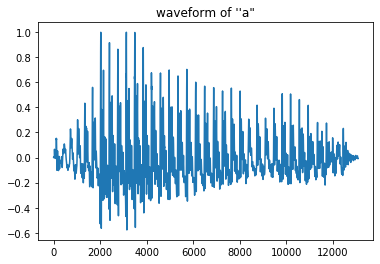

In [4]:
plt.plot(audioData)
plt.title("waveform of \''a\"")
plt.show()

上で述べた標本化や量子化も時間特性について述べた話です。

時間特性から周波数特性へと変換する際に、離散フーリエ変換を用います。

正確には高速フーリエ変換(FFT)なのですが、難しい話になるので、

勉強したい方は[こちら](http://www.ic.is.tohoku.ac.jp/~swk/lecture/yaruodsp/dft.html)をご覧ください。

実際に上の波形をFFTすると、下のようなグラフが得られます。

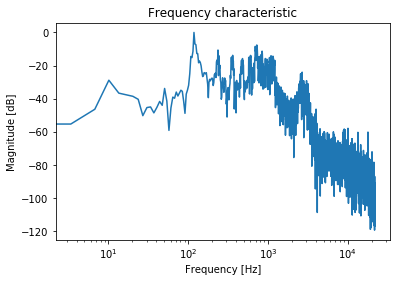

In [5]:
N = audioData.size//2
audioDataF = np.abs(fft.fft(audioData))
f = fft.fftfreq(audioDataF.shape[0], d=1/fs)[:N]
audioDataFdb = 20*np.log10(audioDataF/np.max(audioDataF))[:N]
plt.plot(f, audioDataFdb)
plt.xscale('log')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.title("Frequency characteristic")
plt.show()

周波数特性のグラフでは、音声データに各々の周波数の成分がどの程度含まれているかをみることができます。

上のグラフで言うと、150Hz付近が一番大きな成分ということがわかります。

周波数特性のグラフでは、縦軸にデシベル値[dB]を取ることが一般的です。

デシベル値とは、以下の式で表されます。

$$decibel[dB]= 20 * log_{10}{\frac{P}{P_e}}$$

ただし、$P$は音圧、$P_e$は基準音圧です。

## その他音響用語

### 音の強さ
音の強さは音圧$\times$粒子速度で定義されますが、

基本的には**音圧の2乗**で、パワーの次元であるということを抑えておけば良いです。

### オクターブ
オクターブという言葉は、みなさん聞いたことがあると思います。

f [Hz]に対して 2f [Hz]のことをオクターブと呼び、

その範囲をオクターブバンドと言います。

例えば、1000Hzのオクターブは2000Hzです。

オクターブバンドは音響信号の分析に非常に多く用いられています。

オクターブバンドの詳細については、[こちら](https://www.onosokki.co.jp/HP-WK/c_support/faq/fft_common/CF_10_1.htm)をご覧ください。

## 音響データに含まれる情報いろいろ

### 暗騒音
空気があるところには、至る所に**音**が存在します。

一見?(一聴)静かな場所でも、わずかな音が存在しています。

そのような、騒音のことを**暗騒音**と言います。

詳しく知りたい方は、[このページ](https://www.bouon-taisaku.com/learning/value-nc.html)をご覧ください。

### ホワイトノイズとピンクノイズ
非常に不規則な信号のことを**ノイズ**といいます。

特に、全ての周波数で一様な強さを持つノイズを**ホワイトノイズ**と言います。

理想的なホワイトノイズは相関係数が0となります。

また、オクターブバンド毎に一様な強さを持つノイズを**ピンクノイズ**と言います。

普段人間が聴く環境音や音楽などあらゆる自然音は、ほとんどピンクノイズの周波数特性に近いと言われています。

# pythonで音響信号を簡単にいじってみる。

## wavファイル

音響信号は通常、.wavという拡張子を持つwavファイルとして保存されます。

これは非圧縮の音声データで、バイナリで記録されています。

waveファイルには、ヘッダとして信号のパラメータが記述されています。

In [6]:
filename = "audioSIgnalDemo/i_1.wav"

wr = wave.open(filename) # wavファイルを開く。
params = wr.getparams() # パラメータを取得
wr.close() # wavファイルを閉じる
print(params)

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=11375, comptype='NONE', compname='not compressed')


上記がwavファイルに埋め込まれているパラメータです。
* nchannels ... wavファイルのチャンネル数。モノラルなら1、ステレオなら2、...が割り当てられます。
* sampwidth ... 量子化バイト数[bite]。量子化ビット数で言えば$\times$8です。
* framerate ... サンプリング周波数[Hz]。
* nframes ... 1チャンネルあたりのデータ数。

それ以降は気にしなくて良いです。

上で述べたように、本来はwavファイルはバイナリで記述されているため、floatに直す作業が必要ですが、ものすごくめんどくさい作業です。

そこでscipyのio.wavfileモジュール内のreadという関数を使うと、手軽に読み込めます。

read関数はサンプリング周波数と音響信号を返します。

In [18]:
fs, data = read(filename)
audioData = data / np.max(data)
print("framerate: %d[Hz], nframes = %d"%(fs, audioData.shape[0]))

IPython.display.display(IPython.display.Audio(data=audioData, rate=fs))

framerate: 44100[Hz], nframes = 11375


この音声をプロットしてみましょう。

プロットはいつも通り?matplotlibで行います。

そのままプロットしてしまうと、横軸がフレーム数となってしまうので、

お好みで時間軸のための配列を用意してプロットします。

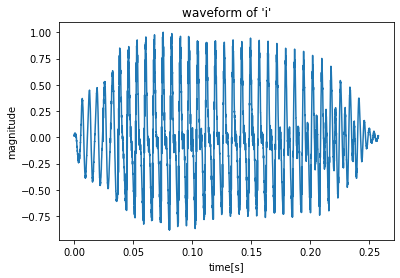

In [8]:
t = np.linspace(0, audioData.shape[0]/fs, audioData.shape[0])
plt.plot(t, audioData)
plt.xlabel("time[s]")
plt.ylabel("magnitude")
plt.title("waveform of \'i\'")
plt.show()

これで、任意の音声波形をプロットすることができるようになりました。

次に、FFTを用いて音声の周波数特性をみてみましょう。

FFTにはscipy.fftpack内にあるfftが標準的で速いFFT関数です。

In [9]:
audioF = fft.fft(audioData)

この1行だけで、FFTができたことになりますが、

このままだと、audioFは複素数のデータとなってしまいます。

音響信号に対してFFTをすると、**振幅特性**と**位相特性**が必要になります。

このうち、重要なのが**振幅特性**です。

振幅特性を得るためにはFFTの結果の絶対値を取る必要があります。

In [10]:
audioF = np.abs(audioF)
audioF /= np.max(audioF)

では、得られた結果をプロットしてみましょう。

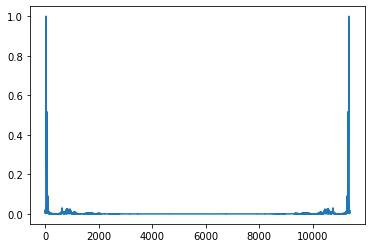

In [11]:
plt.plot(audioF)
plt.show()

上のグラフを見ると、左右対象のグラフが得られたことが見てわかると思います。

これはデジタル化の弊害なのですが、デジタル信号には負の周波数または折り返し周波数と呼ばれるものが存在します。

実際に必要になるのは前半半分だけなので、切り取って使うことにします。

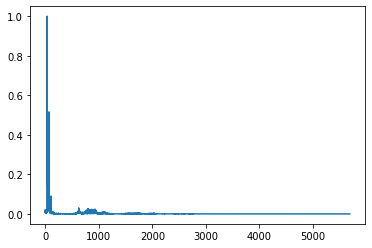

In [12]:
N = audioData.size//2
audioF = audioF[:N]
plt.plot(audioF)
plt.show()

これで、周波数特性が得られました。

しかし、これでは値の大小の差が大きすぎて、うまく値が読み取れませんね。

周波数特性の節でも述べたように、一般的に周波数特性はデシベル値に直して見ます。

また横軸は周波数ですが、周波数軸は対数軸で取ることが一般的です。

このままだとフレーム数がそのまま軸に記載されてしまっているので、

scipy.fftpackのfftfreqを使って、横軸用の配列を作成します。

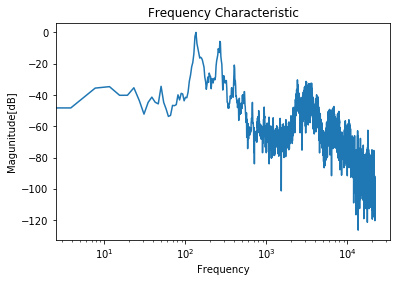

In [13]:
f = fft.fftfreq(audioData.size, d=1/fs)[:N]
audioFdb = 20 * np.log10(audioF)
plt.plot(f, audioFdb)
plt.xscale('log')
plt.xlabel("Frequency")
plt.ylabel("Magunitude[dB]")
plt.title("Frequency Characteristic")
plt.show()

これで周波数特性のグラフが描けるようになりました。

時間波形と周波数特性をプロットするコードは関数化しちゃいましょう。

In [14]:
def fig_time(signal, fs):
    t = np.linspace(0, signal.shape[0]/fs, signal.shape[0])
    plt.plot(t, signal)
    plt.xlabel("time[s]")
    plt.ylabel("magnitude")
    plt.title("waveform")
    plt.show()

def fig_freq(signal, fs, title="Frequency Characteristic"):
    signalF = np.abs(fft.fft(signal)[:signal.size//2])
    freq = fft.fftfreq(signal.size, d=1/fs)[:signal.size//2]
    plt.plot(freq, 20*np.log10(signalF))
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude[dB]")
    plt.xscale('log')
    plt.title(title)
    plt.show()

## フィルタ理論

### 導入
ある音源に対して、特定の周波数成分を小さくしたい、無くしたい、もしくは増大したいと思うことがあるかもしれません。

これは、フィルタ理論によって実現することができます。

ここでは、フィルタ理論について簡潔に紹介します。

フィルタは主にFIRとIIRという2種類のフィルタが存在しますが、今回はFIRについてのみ紹介します。

FIRフィルタはscipy.signal.firwinという関数で簡単に設計することができます。

### 実践

例えば、先ほど周波数特性の節で用いた音源の、1000Hzより大きい周波数を消し去りたい時、以下のように設計します。

In [15]:
import scipy.signal as signal

filter = signal.firwin(numtaps=4096, cutoff=1000, pass_zero=True, fs=fs)

設計したフィルタの周波数特性を見てみましょう。

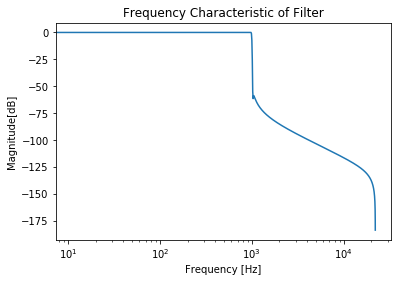

In [16]:
fig_freq(filter, fs, title = "Frequency Characteristic of Filter")

1000Hz以下は一定の特性で、1000Hz以上ではガクンと下がっています。

フィルタ設計は成功です。

これを先ほどの音源に適用するためには、scipy.signal.lfilterという関数が便利です。

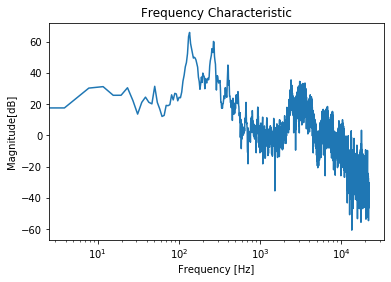

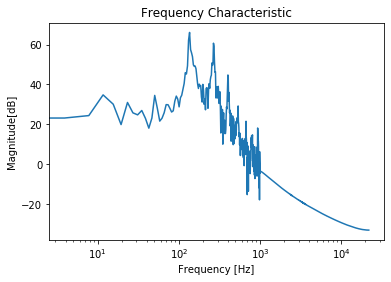

In [17]:
signal_filtered = signal.lfilter(filter, 1, audioData)
fig_freq(audioData, fs)
IPython.display.display(IPython.display.Audio(data=audioData, rate=fs))
fig_freq(signal_filtered, fs)
IPython.display.display(IPython.display.Audio(data=signal_filtered, rate=fs))

上がフィルタを通す前の音声、下がフィルタを通した後の音声です。

グラフを見ると、1000Hz以上の成分がきれいになくなっていることがわかります。

音声を聞いてみても違いは明らかですよね。

もっといろいろなフィルタを作ってみたいなら、[このページ](https://helve-python.hatenablog.jp/entry/2018/06/18/000000)がわかりやすいです。

## インパルス応答

追加予定